## prototipo 1 de la publicación

En el siguiente flujo de trabajo, vamos a realizar un Machine Learning basados en un Base data extraido de la siguiente pagina https://www.data.bsee.gov/Main/GandG.aspx. Esta base, recopila todos los datos generados por perforaciones en las costas del golfo de Mexico alfrente de EEUU. Cabe aclara que, esta base se enfoca en las arenas presentes en los yacimientos y todos los datos recopilados de estas.

### Step 1 

importamos todo lo que vamos a necesitar preliminarmente.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

### Step 2 

Con la libreria pandas leemos, observamos la forma de la data.

In [2]:
df=pd.read_excel('e://piere/documentos/Portafolio/Oil Play Prediction/Data/RAW/2019 Atlas Update.xlsx')

In [3]:
df.columns

Index(['SN_FORMSAND', 'SAND_NAME', 'ASSESSED', 'SDDATE', 'SDYEAR', 'SDDATEH',
       'SDYEARH', 'WELLAPI', 'BOEM_FIELD', 'FCLASS', 'FSTAT', 'FSTRUC',
       'FTRAP1', 'FTRAP2', 'FDDATE', 'FDYEAR', 'EIAID', 'PLAREA', 'SAND',
       'PLAY_NUM', 'PLAY_NAME', 'POOL_NAME', 'CHRONOZONE', 'PLAY_TYPE',
       'SD_TYPE', 'WDEP', 'Original Oil', 'Original Gas', 'Original BOE',
       'Cum Oil', 'Cum Gas', 'Cum BOE', 'Oil Reserves', 'Gas Reserves',
       'BOE Reserves', 'SS', 'THK', 'TAREA', 'TVOL', 'OTHK', 'OAREA', 'OVOL',
       'GTHK', 'GAREA', 'GVOL', 'DRIVE', 'RESTYP', 'POROSITY', 'SW',
       'PERMEABILITY', 'Pi', 'TI', 'SDPG', 'SDTG', 'RSI', 'YIELD', 'PROP',
       'GOR', 'SPGR', 'API', 'BGI', 'BOI', 'RECO_AF', 'RECG_AF', 'OIP', 'GIP',
       'ORF', 'ORECO', 'ORECG', 'ORP', 'GRF', 'GRECO', 'GRECG', 'GRP', 'NCNT',
       'UCNT', 'SCNT', 'TCNT', 'BHCOMP', 'LAT', 'LONG'],
      dtype='object')

In [4]:
df.shape

(13394, 81)

hemos observado que contine 13302 filas y 81 columnas la cuales en el siguiente paso, extraemos las que consideramos mas importes y las que son cuantitativas.

### Step 3

En este paso concatenaremos en otro DataFrame lo anteriormente indicado. Es decir, extraeremos las variables cualitativas mas faciles de obtener en perforación y/o producción. 

In [5]:
data=pd.concat([df["THK"],df["WDEP"],df["TVOL"],df["TAREA"],df["Pi"],df["POROSITY"],df["SW"],df["PERMEABILITY"],df["TI"],df["SS"]],axis=1)

In [6]:
data.shape

(13394, 10)

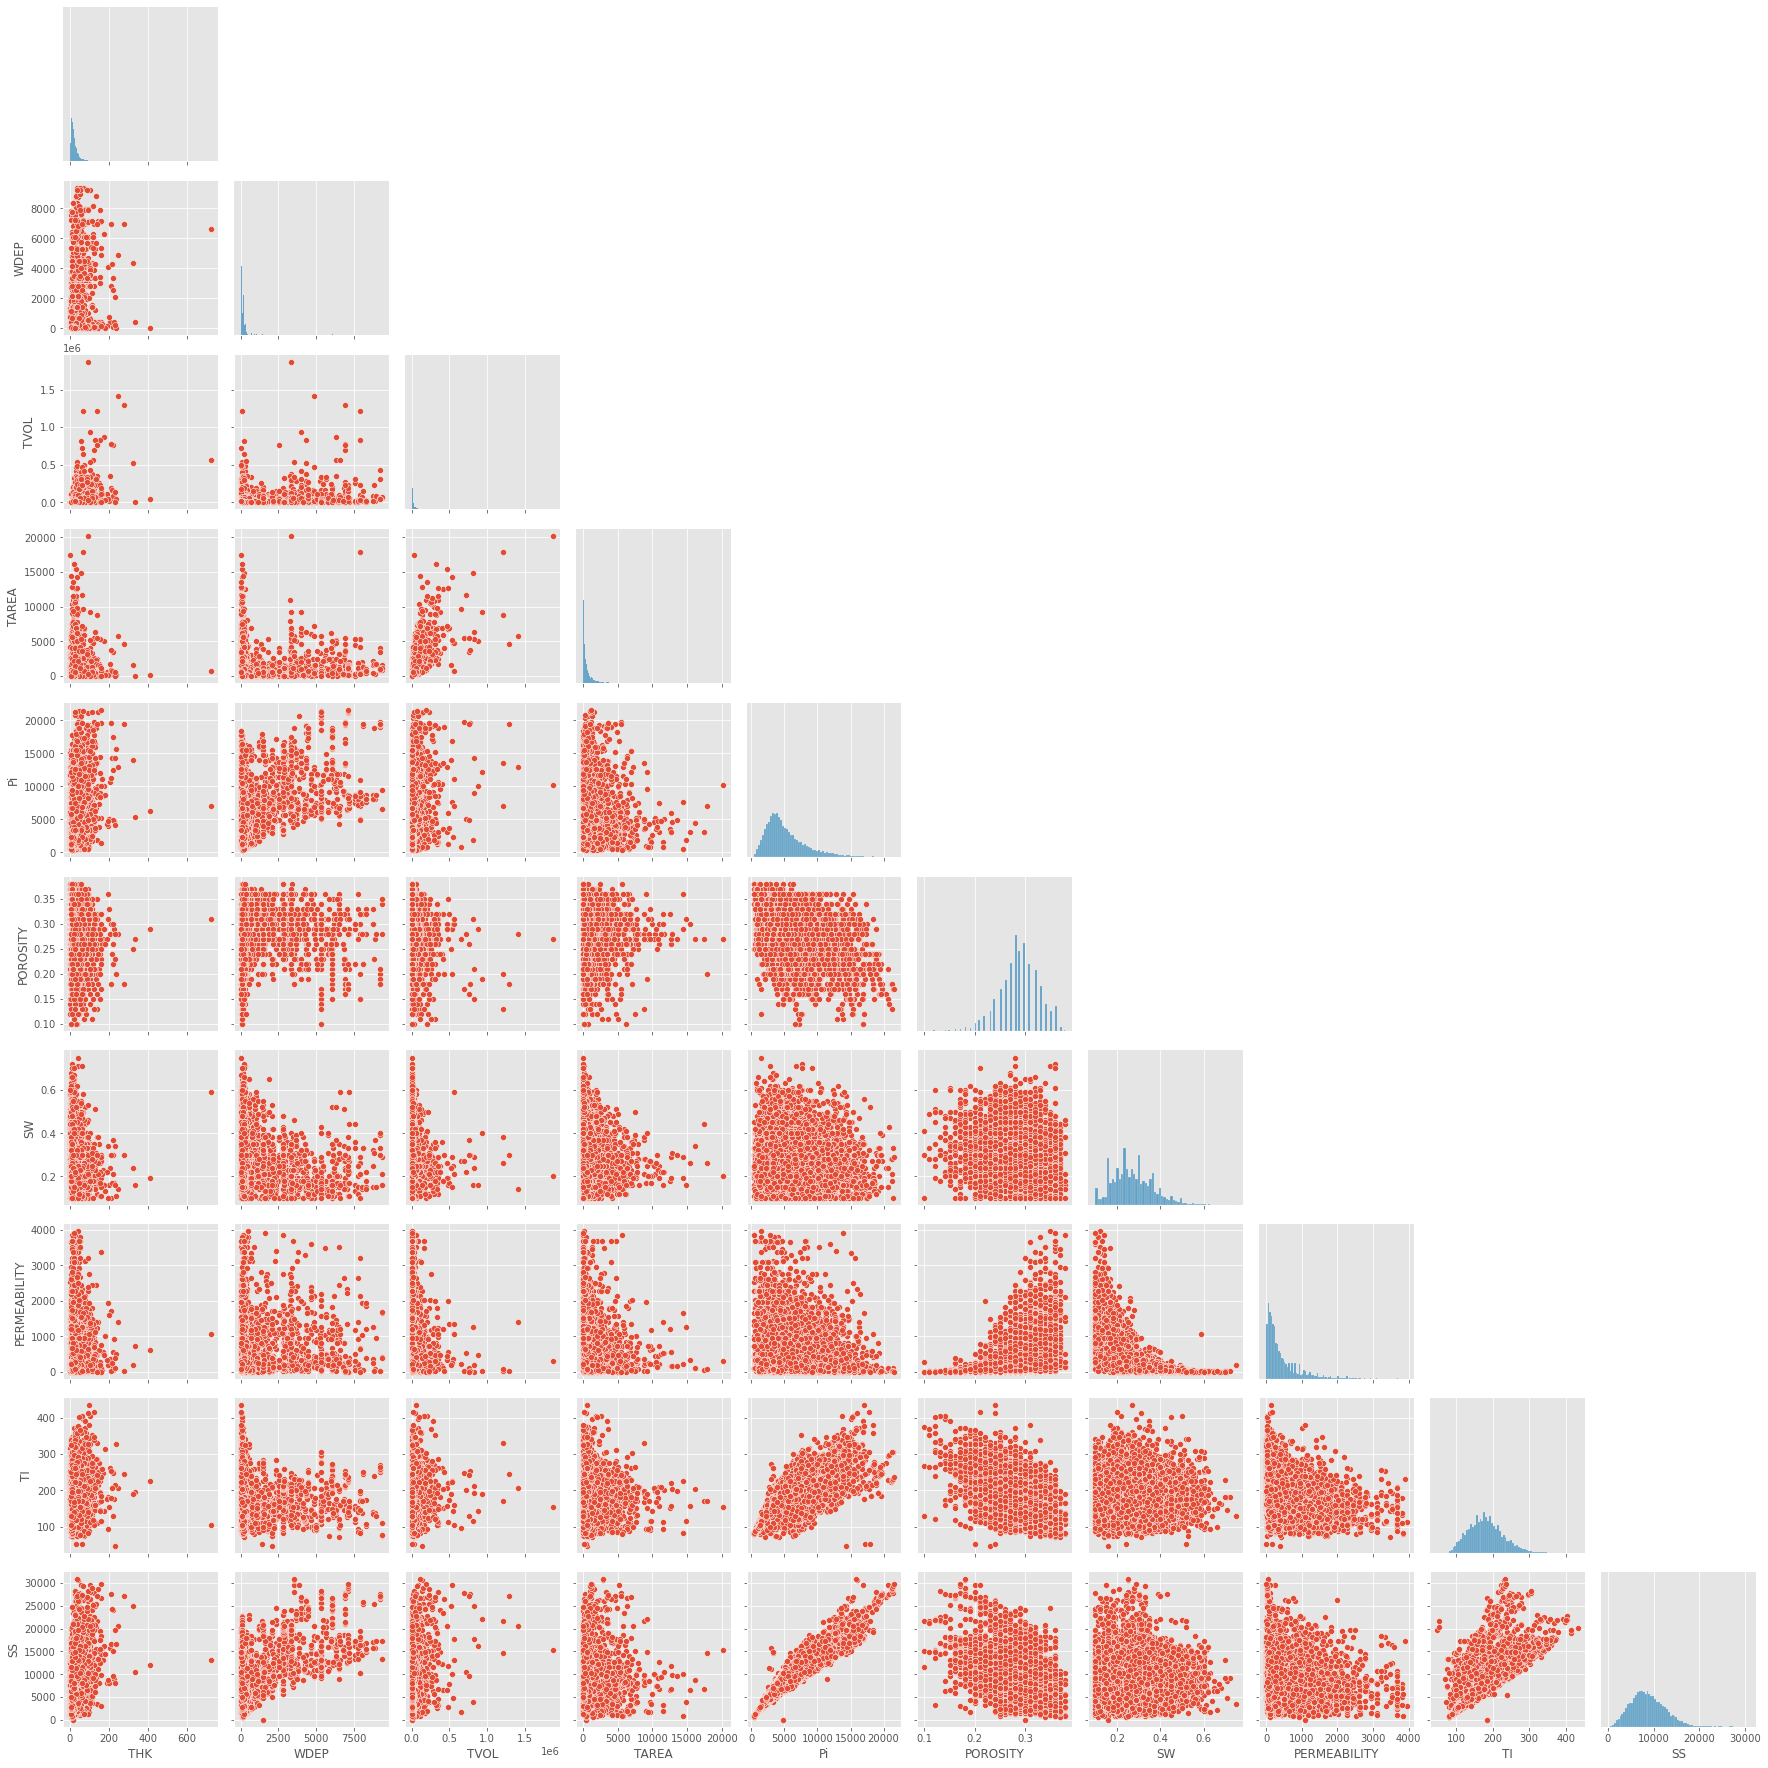

In [7]:
sns.pairplot(data=data,corner=True)

In [8]:
corre=data.corr()


<AxesSubplot:>

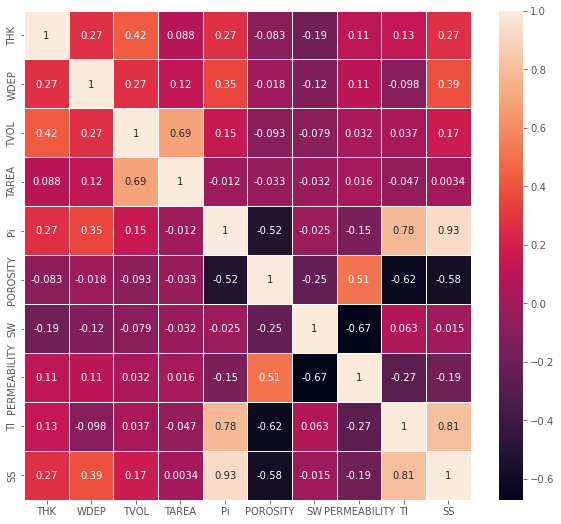

In [9]:
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(corre, vmax=1, square=False,annot=True,linewidths=.5,linecolor="w")

In [10]:
data.isnull().sum()

THK              0
WDEP             0
TVOL             0
TAREA            0
Pi               0
POROSITY         0
SW               0
PERMEABILITY    92
TI               0
SS               0
dtype: int64

In [11]:
permeability_nan=data[data["PERMEABILITY"].isnull()].index.tolist()

In [12]:
data=data.drop(permeability_nan,axis=0)
df=df.drop(permeability_nan,axis=0)

In [13]:
data.dtypes

THK             float64
WDEP              int64
TVOL              int64
TAREA             int64
Pi                int64
POROSITY        float64
SW              float64
PERMEABILITY    float64
TI              float64
SS                int64
dtype: object

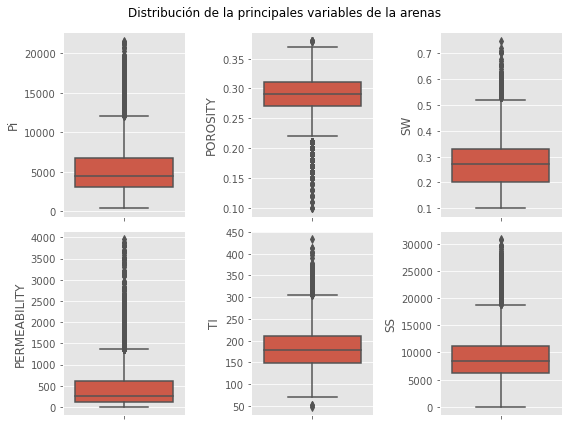

In [14]:

fig, ax= plt.subplots(nrows=2,ncols=3,figsize=(8,6))
ax[0,0]=sns.boxplot(data=data,y="Pi",ax=ax[0,0])
ax[0,1]=sns.boxplot(data=data,y="POROSITY",ax=ax[0,1])
ax[0,2]=sns.boxplot(data=data,y="SW",ax=ax[0,2])
ax[1,0]=sns.boxplot(data=data,y="PERMEABILITY",ax=ax[1,0])
ax[1,1]=sns.boxplot(data=data,y="TI",ax=ax[1,1])
ax[1,2]=sns.boxplot(data=data,y="SS",ax=ax[1,2])
fig.suptitle("Distribución de la principales variables de la arenas")
plt.tight_layout()
    

Como podemos observar en la matriz de correlaciones, y las distribuciones matemáticas de las principales variables de las arenas en el golfo de México. Podemos evidenciar, que entre todas las variables existen una relación como ya es conocida a nivel académico y como estas nos pueden contribuir a desarrollar un buen modelo de clasificación. 

### step 4

realizaremos la grafica de los datos para observar donde nos ubicamos y a cual es el taget al cual queremos llegar

In [15]:
import plotly.express as px

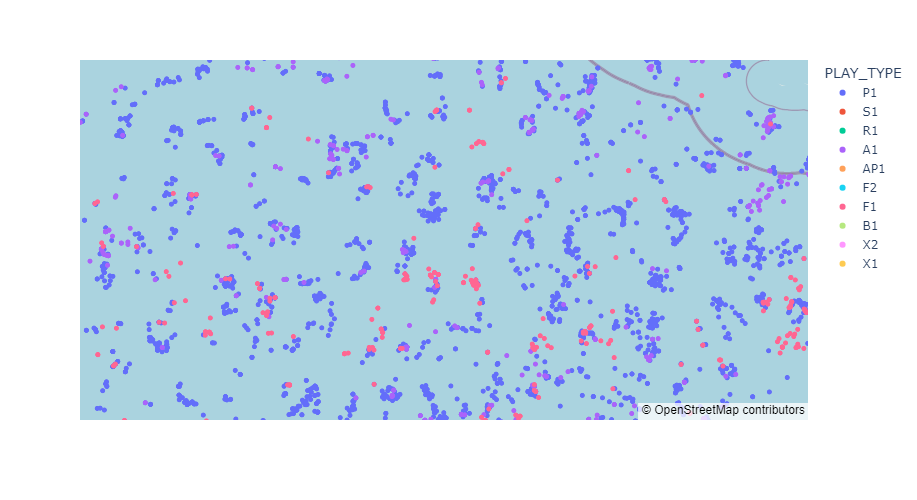

In [16]:
fig=px.scatter_mapbox(df,lat=df.LAT,lon=df.LONG,color='PLAY_TYPE',width=800,height=500)
fig.update_layout(mapbox_style="open-street-map")

In [17]:
Ptypes_value=pd.DataFrame(df["PLAY_TYPE"].value_counts())

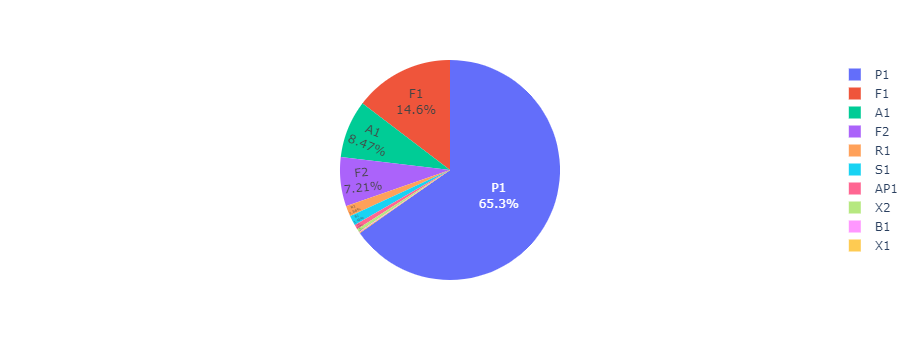

In [18]:
fig=px.pie(Ptypes_value,values='PLAY_TYPE',names=Ptypes_value.index)
fig.update_traces(textposition='inside', textinfo='percent+label')

### Step 5

 #### Ya entramos en nuestros modelos de Machine Learning

***vamos enfocar el machine learning en modelos de clasificación aprovechando la data obetenida para predicir categorias.***

Vamos a utilizar los clasificadores como los árboles. Vamos a iniciar con un árbol de decisión sencillo, luego pasamos por los métodos de ensamble como el RandomForest y terminamos con un AdaBoost.

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [20]:
def report(y_true,y_pred):
    print(classification_report(y_true,y_pred))
def matrix(y_true,y_pred):
    g=confusion_matrix(y_true,y_pred)
    sns.heatmap(data=g,xticklabels=Ptypes_value.index.sort_values(),yticklabels=Ptypes_value.index.sort_values(),cbar=False,annot=True,cmap="Blues",fmt="g",linewidths=.5,linecolor="black")
    

# Tree 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [22]:
X_train,X_test,y_train,y_test=train_test_split(data,df.PLAY_TYPE,random_state=42,test_size=0.3)

In [23]:
clf=tree.DecisionTreeClassifier()

In [24]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred=clf.predict(X_test)

In [26]:
report(y_test,y_pred)

              precision    recall  f1-score   support

          A1       0.42      0.47      0.45       332
         AP1       0.29      0.27      0.28        22
          B1       0.67      0.50      0.57         4
          F1       0.61      0.62      0.61       571
          F2       0.96      0.97      0.97       283
          P1       0.84      0.81      0.82      2634
          R1       0.19      0.20      0.19        66
          S1       0.30      0.40      0.34        52
          X1       0.40      0.29      0.33         7
          X2       0.65      0.75      0.70        20

    accuracy                           0.75      3991
   macro avg       0.53      0.53      0.53      3991
weighted avg       0.76      0.75      0.75      3991



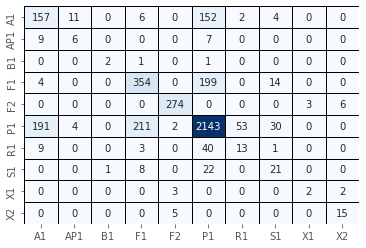

In [27]:
matrix(y_test,y_pred)

# RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier


In [29]:
clf=RandomForestClassifier(n_estimators=200)

In [30]:
clf.fit(X_train,y_train)
y_pred_r=clf.predict(X_test)

In [31]:
report(y_test,y_pred_r)

              precision    recall  f1-score   support

          A1       0.65      0.42      0.51       332
         AP1       0.38      0.14      0.20        22
          B1       1.00      1.00      1.00         4
          F1       0.81      0.61      0.70       571
          F2       0.94      0.99      0.97       283
          P1       0.83      0.95      0.88      2634
          R1       1.00      0.05      0.09        66
          S1       0.80      0.08      0.14        52
          X1       1.00      0.14      0.25         7
          X2       0.77      0.50      0.61        20

    accuracy                           0.82      3991
   macro avg       0.82      0.49      0.53      3991
weighted avg       0.82      0.82      0.80      3991



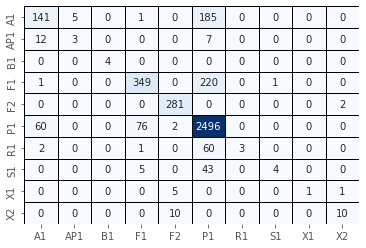

In [32]:
matrix(y_test,y_pred_r)

# AdaBoostClassifier

In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [34]:
clf=AdaBoostClassifier()

In [35]:
clf.fit(X_train,y_train)
y_pred_a=clf.predict(X_test)

In [36]:
report(y_test,y_pred_a)

              precision    recall  f1-score   support

          A1       0.00      0.00      0.00       332
         AP1       0.05      0.73      0.09        22
          B1       0.00      0.00      0.00         4
          F1       0.00      0.00      0.00       571
          F2       0.00      0.00      0.00       283
          P1       0.67      0.92      0.77      2634
          R1       0.00      0.00      0.00        66
          S1       0.00      0.00      0.00        52
          X1       0.00      0.00      0.00         7
          X2       0.00      0.00      0.00        20

    accuracy                           0.61      3991
   macro avg       0.07      0.16      0.09      3991
weighted avg       0.44      0.61      0.51      3991



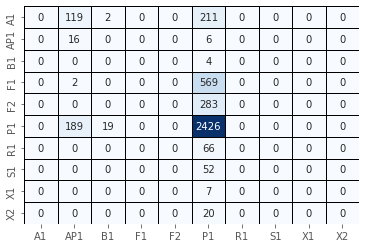

In [37]:
matrix(y_test,y_pred_a)

In [38]:
data["TARGET"]=df["PLAY_TYPE"]

In [39]:
data.to_csv("E:\piere\Documentos\Portafolio\Oil Play Prediction\Data\processed\data_ready.csv",index=False)

# Conclusión
Después de hacer un recorrido por los tipos de clasificación que podemos aplicar a mis datos, observamos que los mejores clasificadores se comporta con el método de Ensamble de Random Forest. Sin embargo, al ir más profundo dentro de mis resultados, identificamos que la mayoría de mis datos se concentran en una sola clase, impidiendo una óptima clasificación a otros labels menos recurrentes. En el Siguiente Notebooks buscaremos mejorar este Score. 